# State wise plot

In [108]:
import pandas as pd
import numpy as np

In [109]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
# this only need to be run once
%load_ext rpy2.ipython
%R library(ggplot2)

%R library(maps)

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


array(['usmap', 'dplyr', 'urbnmapr', 'sf', 'maps', 'ggplot2', 'tools',
       'stats', 'graphics', 'grDevices', 'utils', 'datasets', 'methods',
       'base'], dtype='<U9')

In [110]:
def handle_na_values(df):
    out_df = df.copy()
    for i in out_df.columns:
        if out_df[i].dtype == np.object:
            out_df[i] = out_df[i].astype(str)
    return out_df

In [111]:
%%R 
library(ggplot2)
library(maps)
library(sf)
library(urbnmapr)
library(dplyr)

In [112]:

def txt_into_df(path ):

    with open(path) as f:
        l = f.read()

    l = l.split('\n')

    l = [i.split('\t') for i in l]

    len_ = len(l[0])

    l = [i for i in l if len(i)==len_]

    return pd.DataFrame(l[1:] , columns = l[0])
    

In [113]:
state = txt_into_df('../input/state_2017.txt')

In [114]:
state  = state.iloc[:-1]

In [115]:
state.columns = ["Notes", "State", "State Code", 'Deaths', 'Population',
       'Crude Rate', 'Age Adjusted Rate']

In [116]:
state.State = state.State.apply(lambda x : x.split('"')[1])
state['Age Adjusted Rate'] = state['Age Adjusted Rate'].astype(float)

In [117]:
state = state[['State' , 'Age Adjusted Rate']]

In [118]:
state.columns = ['state_name', 'AAR']

In [119]:
state_df = state

In [120]:
%R -i state_df

In [121]:
state_df.columns

Index(['state_name', 'AAR'], dtype='object')

In [122]:
def color_func(value_in):
    if value_in>40:
        return '5'
    elif 30<value_in<=40:
        return '4'
    elif 20<value_in<=30:
        return '3'
    elif 10<value_in<=20:
        return '2'
    else:
        return '1'

In [123]:
state_df['fill_color'] = state_df.AAR.apply(color_func)

In [124]:
%R -i state_df

In [125]:
%R library(usmap)

array(['usmap', 'dplyr', 'urbnmapr', 'sf', 'maps', 'ggplot2', 'tools',
       'stats', 'graphics', 'grDevices', 'utils', 'datasets', 'methods',
       'base'], dtype='<U9')

In [126]:
%%R
head(statepop)

plot_df <- left_join(statepop , state_df , by=c('full'='state_name'))

In [127]:
import matplotlib.pyplot as plt

R[write to console]: Saving 15 x 15 in image



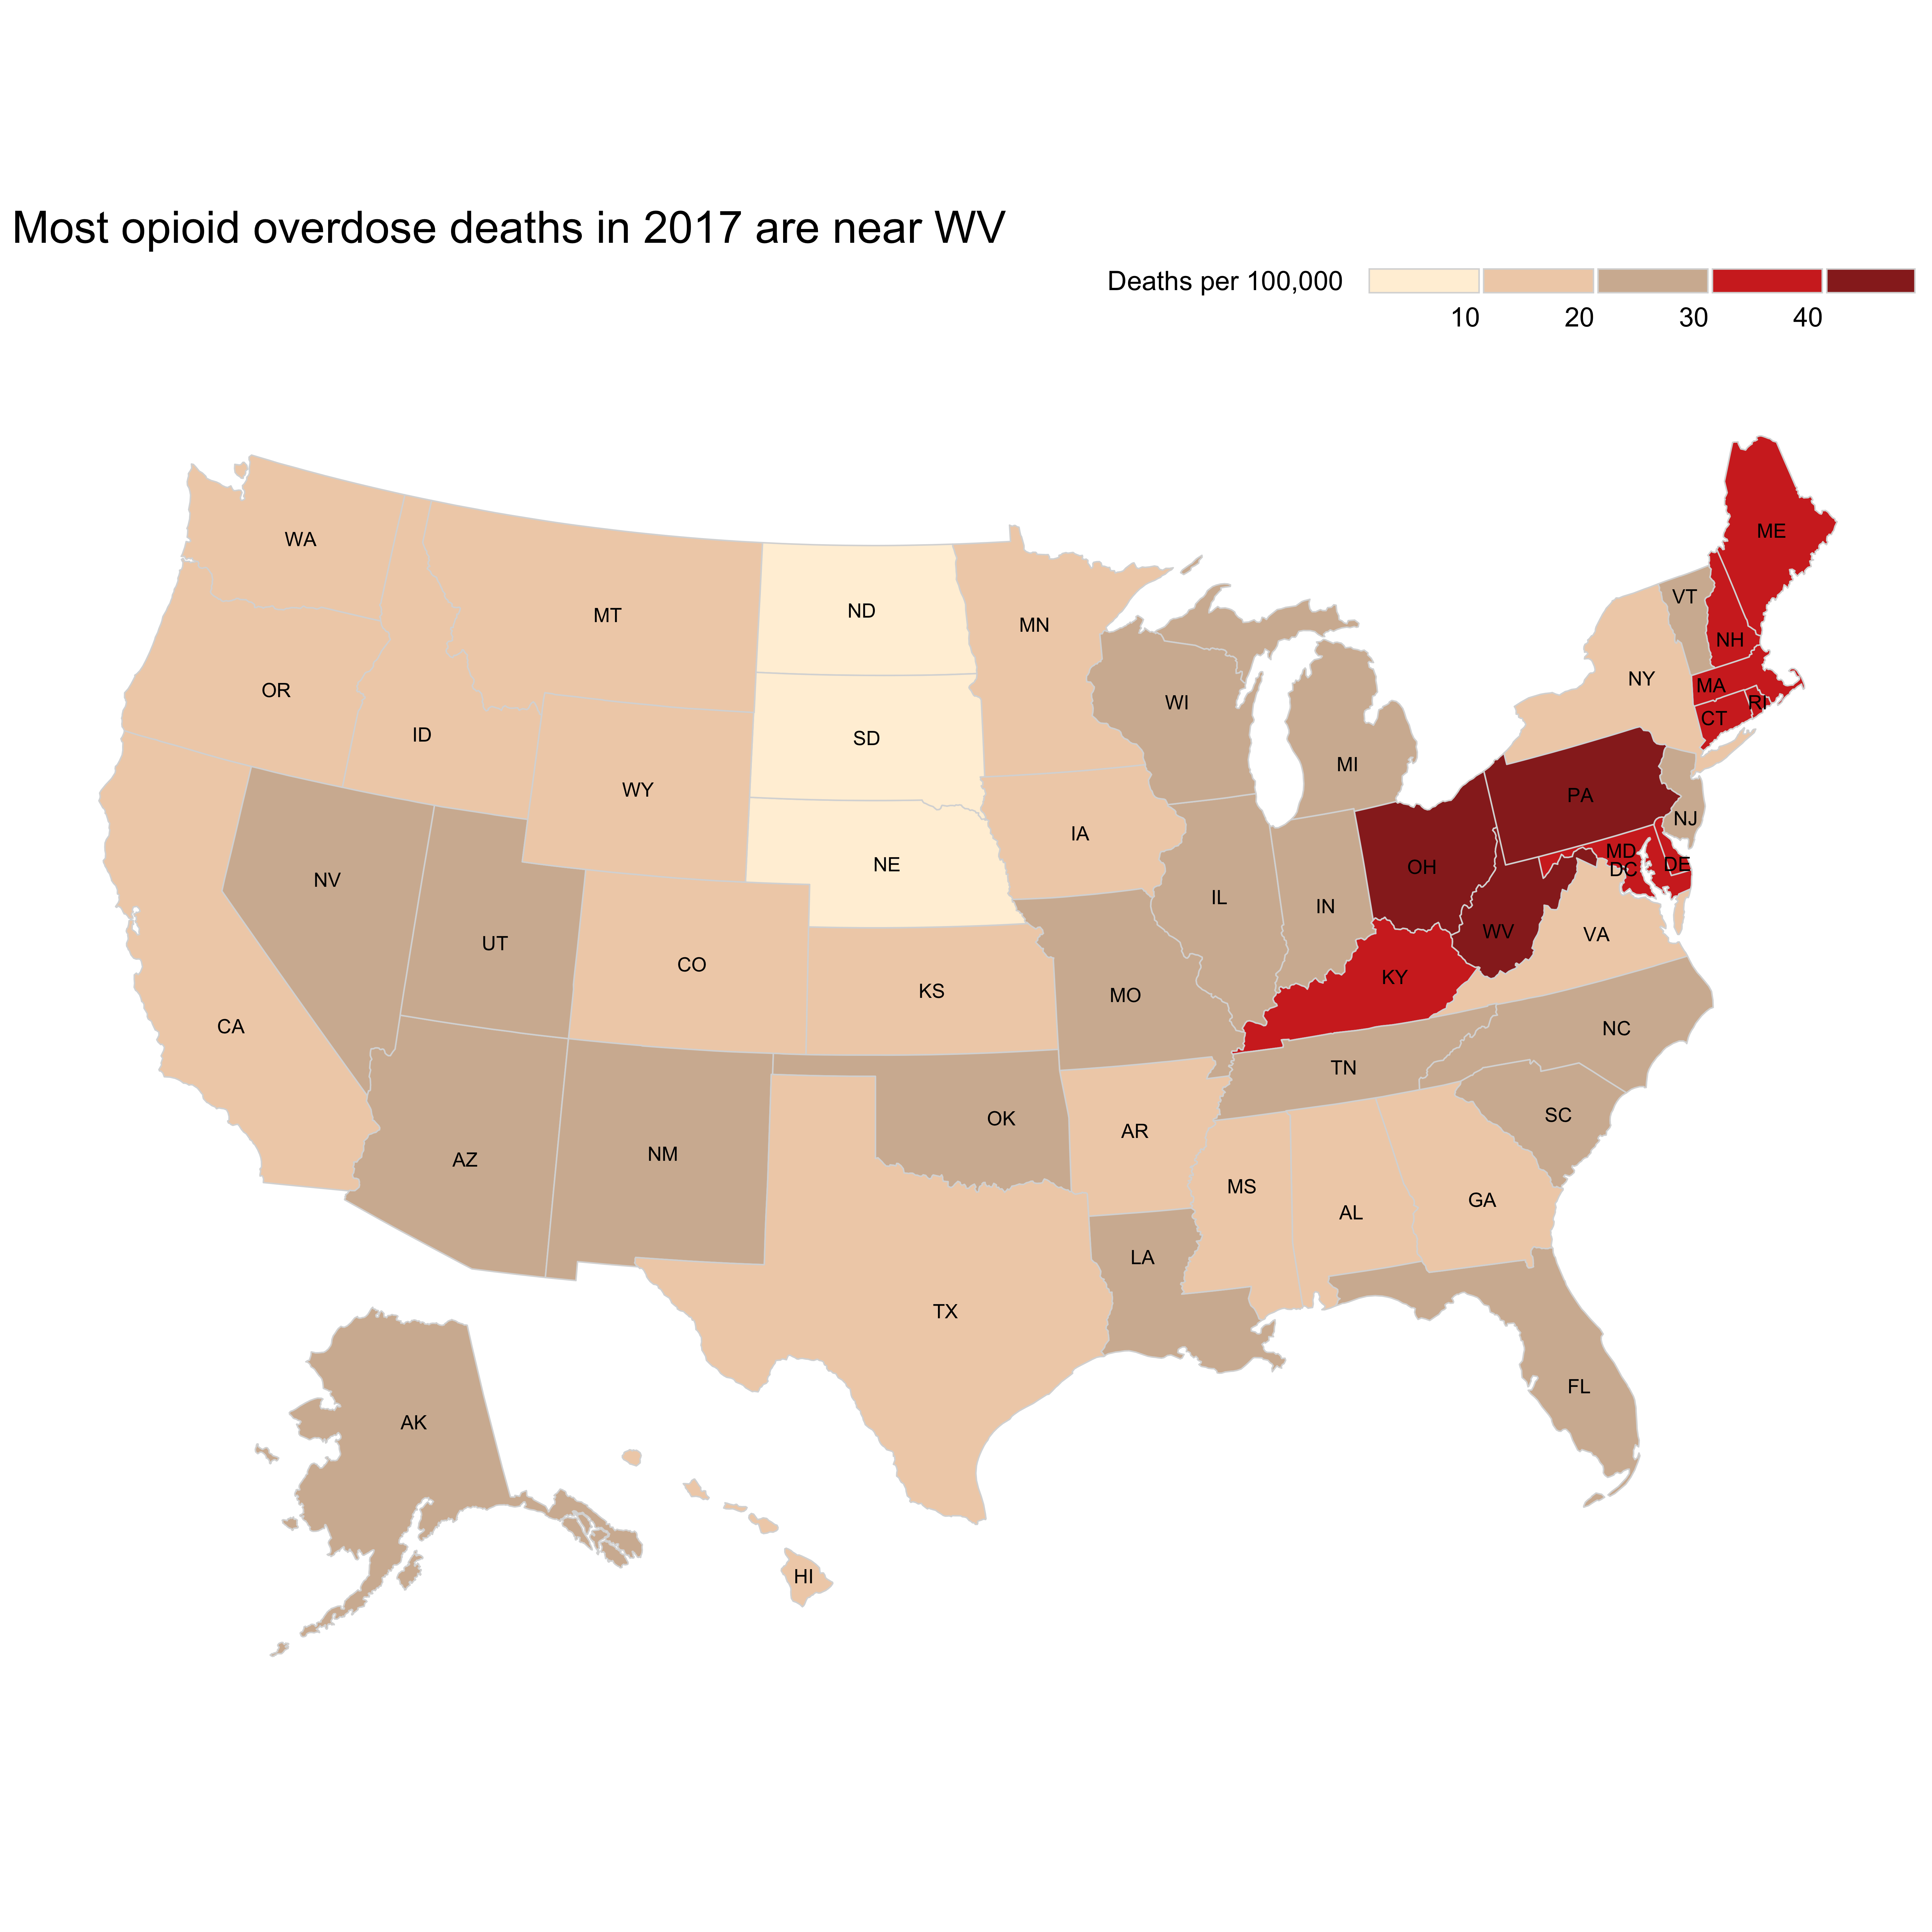

In [132]:
%%R -w 15 -h 15 --units in -r 400




plot_usmap(data = plot_df, values = 'fill_color',labels=TRUE,color = 'grey85',alpha=0.9)  + 

scale_fill_manual(labels=c('           10','           20','           30','           40'
                           ,'           ')
                  ,values = c('papayawhip','peachpuff2','peachpuff3','red3','red4')) +

  theme(legend.position='top',
       legend.justification = c(1,1 ),
       legend.text = element_text(color='black',size=15),
       legend.title=element_text(color='black',size=15),legend.key.size = unit(2,"line"),
       plot.title  = element_text(size=25),
       legend.spacing.x=unit(0.05,'cm')) + 

guides (  fill = guide_legend( title = 'Deaths per 100,000   \n\n'
                              ,label.position='bottom',keywidth=3.5,keyheight=1) )  + 

ggtitle('Most opioid overdose deaths in 2017 are near WV') + 

ggsave('../output/state_choropleth.png')
  